In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
all_data = np.loadtxt("./preprocessed_data/unsampled_all_data.csv", delimiter=',')

In [6]:
print(all_data.shape)
data = all_data[:,:-3]
print(data.shape)
classes = all_data[:,-3]
print(classes.shape)

(217656, 259)
(217656, 256)
(217656,)


Text(0.5, 1.0, 'PCA')

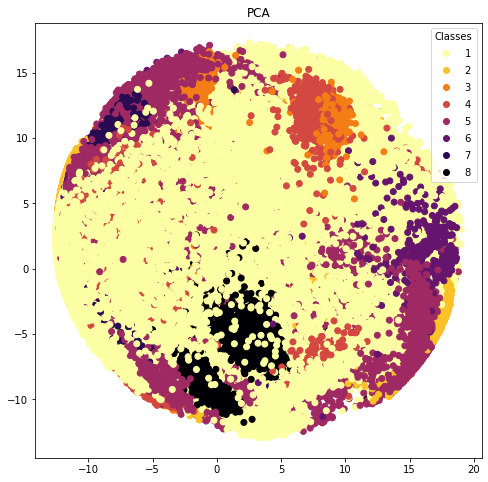

In [9]:
from sklearn.decomposition import PCA
x_pca = PCA(n_components=50,random_state=42).fit_transform(data)
plt.figure(figsize=(8,8))

categories=['N','L','R','V','A','F','f','/']
scatter = plt.scatter(x_pca[:,0],x_pca[:,1],c=classes, cmap='inferno_r')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA')


In [ ]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2,random_state=42,perplexity=100, verbose=5).fit_transform(x_pca)
plt.figure(figsize=(8,8))

categories=['N','L','R','V','A','F','f','/']
scatter = plt.scatter(x_tsne[:,0],x_tsne[:,1],c=classes, cmap='inferno_r')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA and TSNE')


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 217656 samples in 2.675s...


In [ ]:
import umap
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=100, a = 0.5, b = 1.2)
embedding = reducer.fit_transform(x_pca)
embedding.shape
plt.figure(figsize=(8,8))

plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], c=classes, cmap='inferno')
plt.legend(title="Classes",loc='upper right',*scatter.legend_elements())
plt.title('PCA and UMAP')